In [1]:
# 데이터 불러오기

election <- read.csv("./Data/election_2022.csv")
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [2]:
# 선거인수 : 투표해야할 사람 수 , 투표수: 투표한 사람 수 3명의 후보 합 != 투표수 (다른 후보 뽑은 사람도 있으니까)

In [3]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [4]:
summary(election)

       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

In [5]:
library(plotrix)

In [6]:
library(dplyr)

election.total<- aggregate(election$투표수~election$광역시도,election,sum)
colnames(election.total) <- c("광역시도","투표수")
election.total <- arrange(election.total,desc(election.total[,2]))

election.total


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



광역시도,투표수
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168
전라북도,1235212


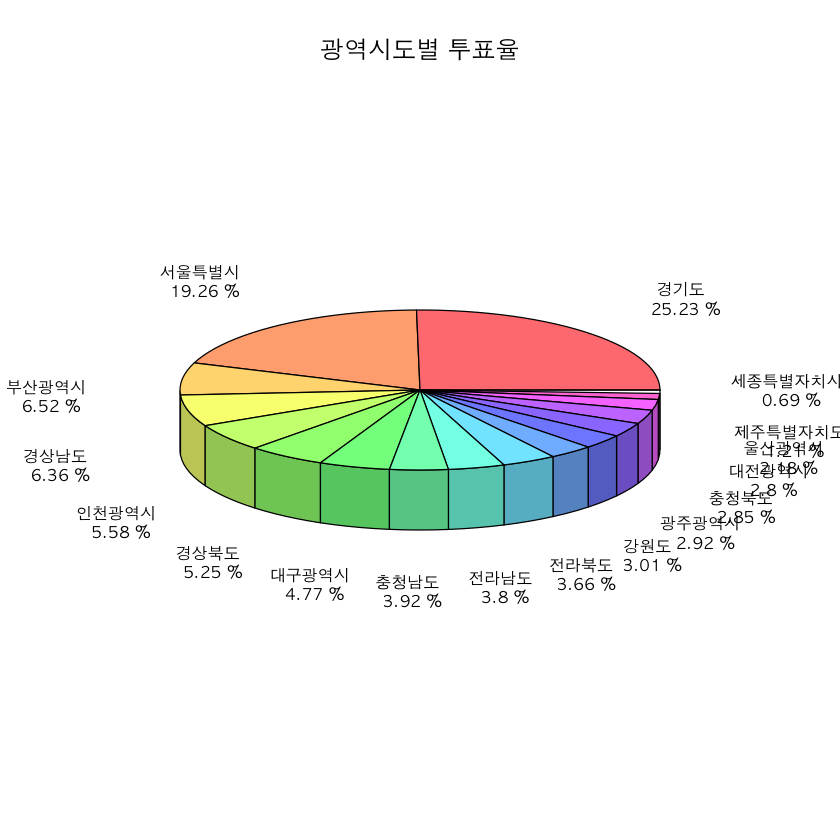

In [7]:
ratio <- election.total[,2] / sum(election$투표수) *100
# 광역시도별 투표율을 보기위해 aggregate로 만든 투표수를 사용함 sum은 aggregate 전 후 투표수를 사용해도 무방

options(warn = -1)
par(family = "AppleGothic")
pie3D(ratio,
      main = "광역시도별 투표율",
      labels = paste(election.total[,1],"\n",round(ratio,2),"%"),
      labelcex = 0.8,
      col = rainbow(length(ratio),s=0.5),
      radius = 0.8
     )

In [8]:
# electionSum = 이재명 + 윤석열 + 심상정 

election$electionSum <- apply(election[,5:7],1,sum)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [9]:
# electionRatio <- 투표수 대비 electionSum의 퍼센트 구해서 넣기

election$electionRatio <- election$electionSum / election$투표수 *100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [10]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기

# sol 1) 정렬
arrange(election,desc(electionRatio))[1,]
arrange(election,desc(electionRatio))[nrow(election),]

# sol 2) subset
subset(election, electionRatio == max(electionRatio))
subset(election, electionRatio == min(electionRatio))

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [11]:
# election_2022.job1.csv로 저장하기

write.csv(election,"./Data/election_2022.job1.csv",row.names = F)

---

광역시도,윤석열,ratio
경기도,3859666,23.7365410
서울특별시,3255747,20.0225025
경상북도,1278922,7.8652361
부산광역시,1270072,7.8108095
경상남도,1237346,7.6095481
대구광역시,1199888,7.3791853
인천광역시,878560,5.4030518
충청남도,670283,4.1221701
강원도,544980,3.3515698
충청북도,483221,2.9717585


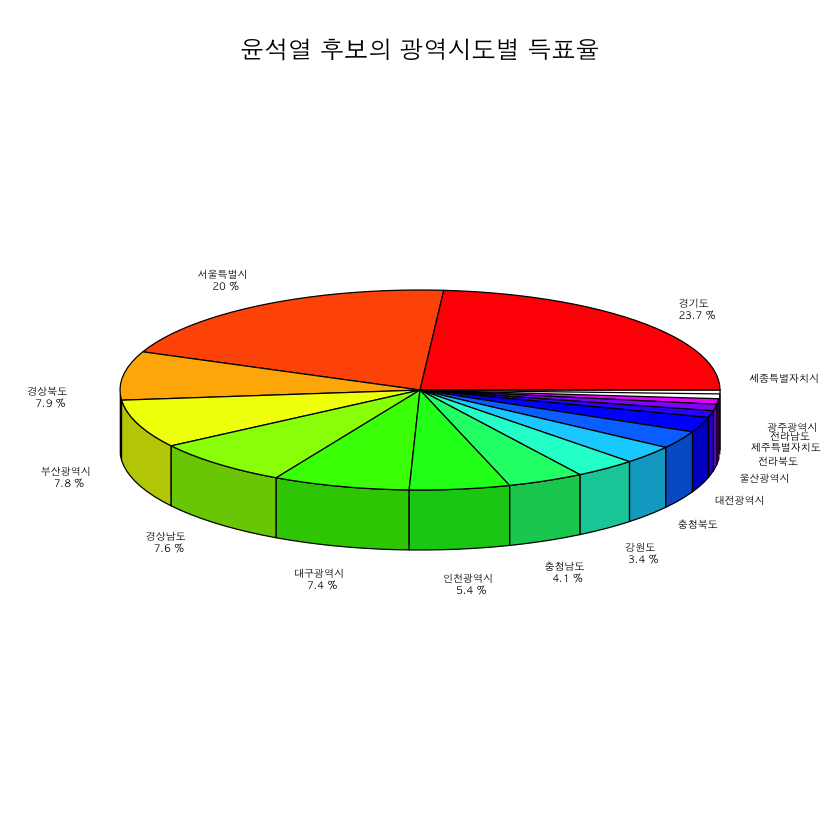

In [12]:
# 각 후보(윤석열, 이재명, 심상정)의 광역시도별 득표율을 3D Pie Chart로 표현하기
# (단, 득표율이 3% 미만인 광역시도는 광역시도 명만 출력하고 퍼센트는 출력하지 않는다. /퍼센트 단위 소수 한자리)

par(family = "AppleGothic")

윤석열 <- arrange(aggregate(윤석열~광역시도,election,sum),
               desc(aggregate(윤석열~광역시도,election,sum)[,2]))
윤석열$ratio <- (윤석열$윤석열 / sum(윤석열$윤석열))*100

윤석열

pie3D(윤석열$ratio,
      main = "윤석열 후보의 광역시도별 득표율",
      labels = paste(윤석열$광역시도,"\n",
                     ifelse(윤석열$ratio>=3,paste(round(윤석열$ratio,1),"%"),"")),
      labelcex = 0.5
     )

광역시도,이재명
경기도,4297931
서울특별시,2944981
전라남도,1094872
전라북도,1016863
인천광역시,913320
부산광역시,831896
광주광역시,830058
경상남도,794130
충청남도,589991
대전광역시,434950


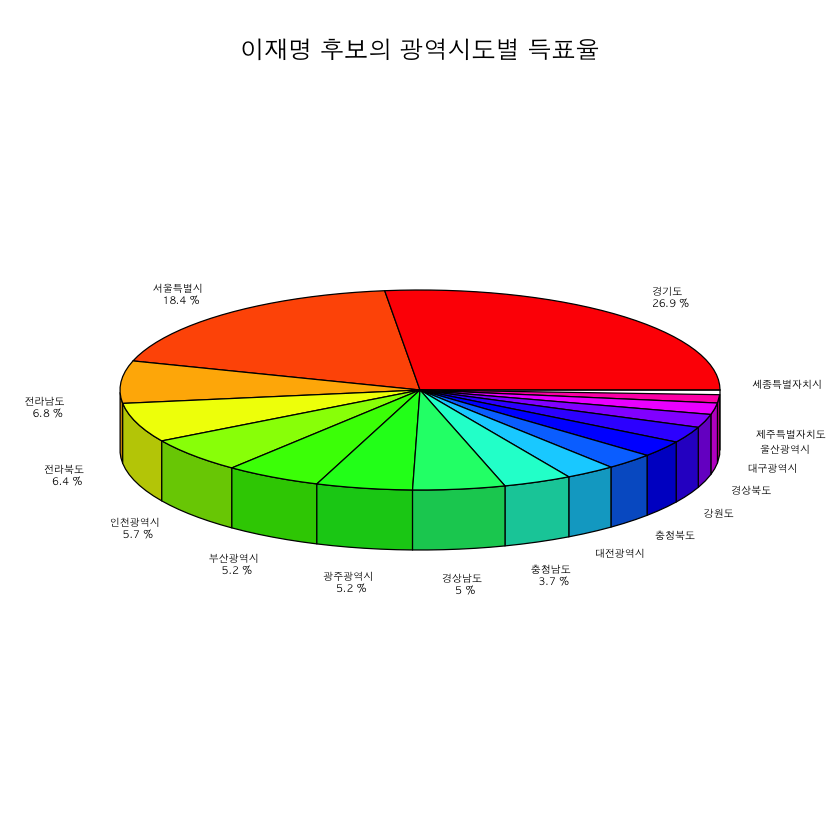

In [13]:
votes <- aggregate(이재명 ~ 광역시도,election,sum)
votes <- arrange(votes,desc(votes$이재명))

options(warn = -1)
투표수 <- votes$이재명
시군구 <- votes$광역시도
label <- paste(시군구,"\n", ifelse(votes$이재명/sum(votes$이재명)*100 >=3 
                                ,paste(round(votes$이재명/sum(votes$이재명)*100,1),"%"),""))

votes

par(family = 'AppleGothic')
pie3D(투표수,
      main = "이재명 후보의 광역시도별 득표율",
      labels = label,
      labelcex = 0.5,
    )

광역시도,심상정,투표율
경기도,201113,25.2
서울특별시,180324,22.6
경상남도,52591,6.6
인천광역시,51852,6.5
부산광역시,47541,6.0
경상북도,33123,4.2
충청남도,31789,4.0
대구광역시,31131,3.9
대전광역시,25445,3.2
충청북도,25247,3.2


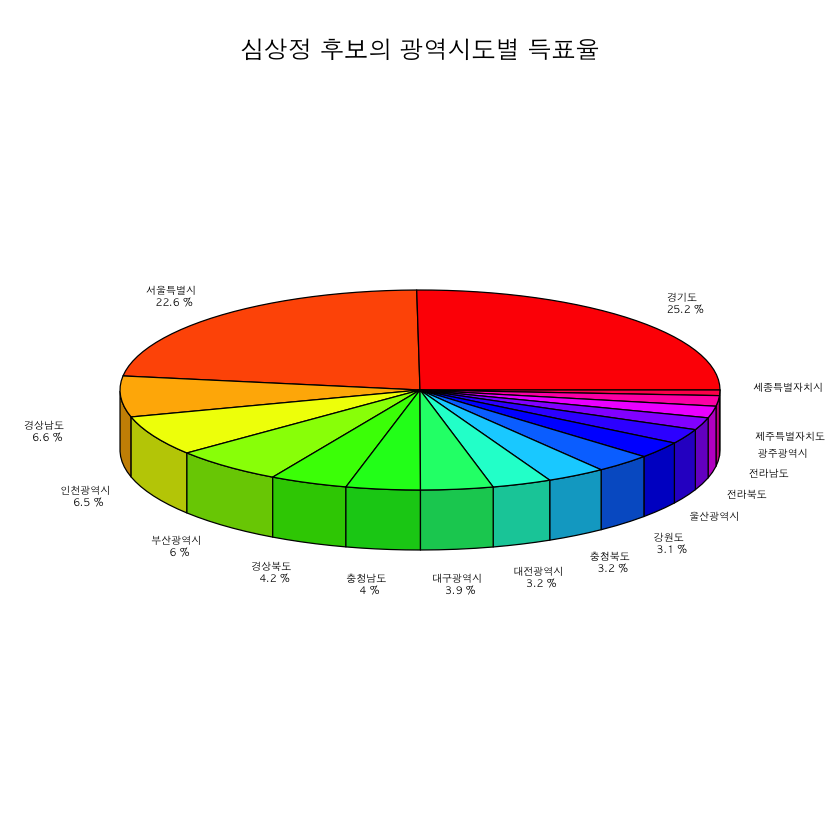

In [14]:
voteSim <- aggregate(심상정 ~ 광역시도,election,sum)
ratio <- round(voteSim$심상정/sum(voteSim$심상정)*100,1)
voteSim$투표율 <- ratio

voteSim <- arrange(voteSim, desc(투표율))

voteSim

label <- paste(voteSim$광역시도,"\n", ifelse(voteSim$투표율 >=3, paste((voteSim$투표율),"%"),""))
   
par(family = 'AppleGothic')

pie3D(voteSim$투표율,
   main = "심상정 후보의 광역시도별 득표율",
    labels =label,
    labelcex = 0.5,
   )

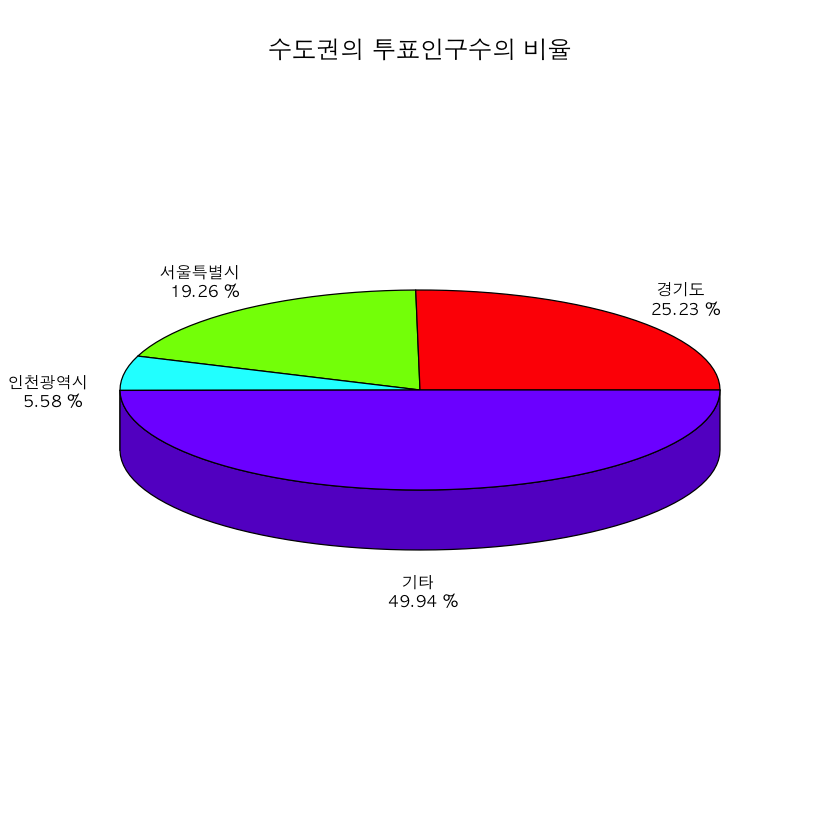

In [15]:
# 수도권(경기도, 서울, 인천)의 투표인구수의 퍼센트?
# 전체인구 대비
수도권_ratio <- round(c(arrange(election.total)[c(1,2,5),2],
                     sum(arrange(election.total)[-c(1,2,5),2])) /
                        sum(election.total$투표수)*100,2)

par(family = "AppleGothic")

pie3D(수도권_ratio,
      main = "수도권의 투표인구수의 비율",
      labels = paste(c(as.character(election.total[c(1,2,5),1]),"기타")
                     ,"\n",수도권_ratio,"%"),
      labelcex = 0.8
     )


In [16]:
# 윤석열 후보의 서울득표 top 5만 득표율로 표시하고 나머지 지역은 기타로 합치기 (pie chart로 나타내기)

# subset(election,광역시도 == '서울특별시')
election_seoul <- election[election$광역시도 == '서울특별시',]
election_seoul_윤석열 <- arrange(election_seoul,desc(윤석열))[,c(2,6)]
head(election_seoul_윤석열)

시군구,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593


In [17]:
# Ratio 구하기
election_seoul_윤석열_ratio <-
    round(c(election_seoul_윤석열[1:5,2],sum(election_seoul_윤석열[-c(1:5),2])) /
            sum(election_seoul_윤석열$윤석열)*100,2)
election_seoul_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [18]:
# Label 만들기
election_seoul_윤석열_label <-
    c(as.character(election_seoul_윤석열$시군구[1:5]),"기타")
election_seoul_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

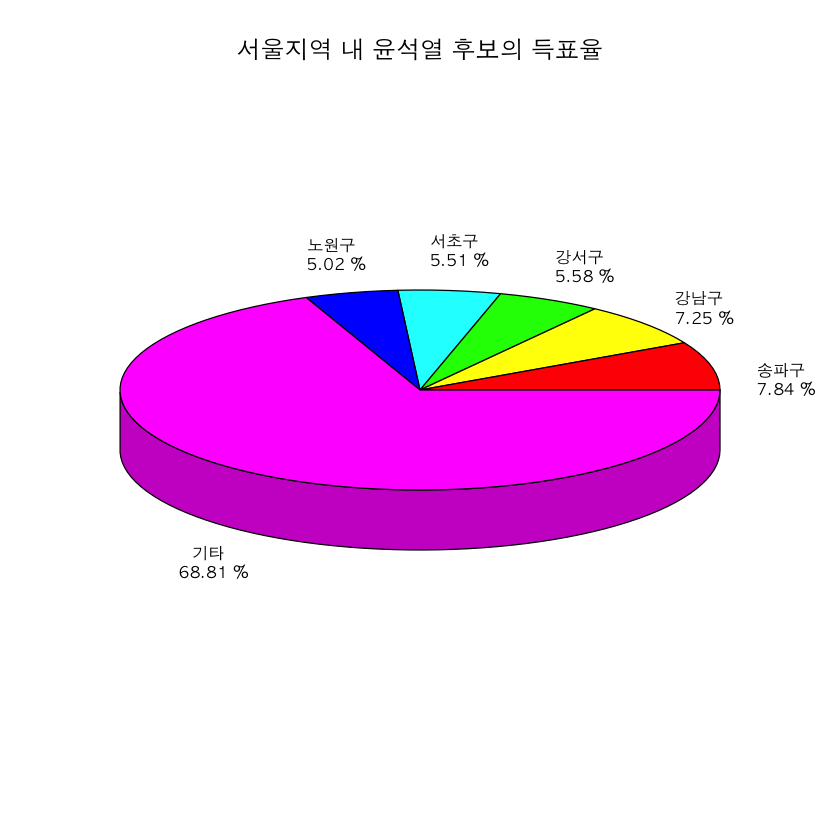

In [19]:
par(family = "AppleGothic")

pie3D(election_seoul_윤석열_ratio,
      main = "서울지역 내 윤석열 후보의 득표율",
      labels = paste(election_seoul_윤석열_label,"\n",election_seoul_윤석열_ratio,"%"),
      labelcex = 0.8
     )

# 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구


In [20]:
head(election_seoul)
election_성북구 <- subset(election_seoul,election_seoul$시군구 == "성북구")[,c(2,c(4:7))] 
election_성북구


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


,시군구,투표수,이재명,윤석열,심상정
8,성북구,292187,142702,135044,8952


In [21]:
pob_윤석열 <- subset(election,시군구=="성북구")
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141


In [22]:
vote <- as.numeric(c(pob_윤석열[,5:7], pob_윤석열[,4]-sum(pob_윤석열[,5:7])))
vote

vote_ratio <- vote[1:4]/sum(vote)*100
vote_ratio

[1] 142702 135044   8952   5489

[1] 48.839271 46.218346  3.063791  1.878591

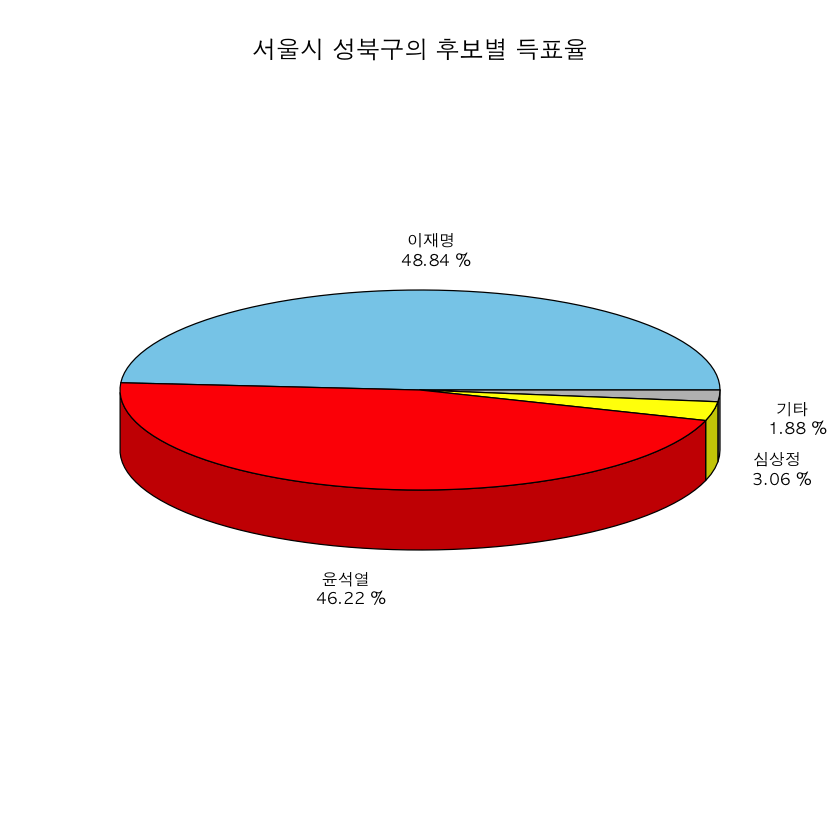

In [23]:
par(family = "AppleGothic")

pie3D(vote_ratio,
      main = "서울시 성북구의 후보별 득표율",
      labels = paste(c(colnames(election_성북구[,3:5]),"기타"),"\n",round(vote_ratio,2),"%"),
      col = c("sky blue","red","yellow","gray"),
      labelcex = 0.8
     )

---
### 여기서부터 5/3 진도



In [24]:
# 투표수가 가장 많은 4지역(광역시도)의 후보별 득표수 차이를 막대그래프로 시각화

election.t <- aggregate(election$이재명~election$광역시도,election,sum)
colnames(election.t) <- c("광역시도","이재명")

election.t$윤석열 <- c(arrange(aggregate(윤석열~광역시도,election,sum),
                            desc(aggregate(윤석열~광역시도,election,sum)[,2]))[,2])

election.t$심상정 <- c(arrange(aggregate(심상정~광역시도,election,sum),
                            desc(aggregate(심상정~광역시도,election,sum)[,2]))[,2])

election.t_top4_name <- head(arrange(election.t,desc(투표수)),4)[,1]
election.t_top4_name
election.t_top4 <- head(arrange(election.t,desc(투표수)),4)[,2:4]
election.t_top4 <- t(election.t_top4)
colnames(election.t_top4) <- election.t_top4_name
election.t_top4




[1] 강원도   경기도   경상남도 경상북도
17 Levels: 강원도 경기도 경상남도 경상북도 광주광역시 대구광역시 ... 충청북도

,강원도,경기도,경상남도,경상북도
이재명,419644,4297931,794130,418371
윤석열,3859666,3255747,1278922,1270072
심상정,201113,180324,52591,51852


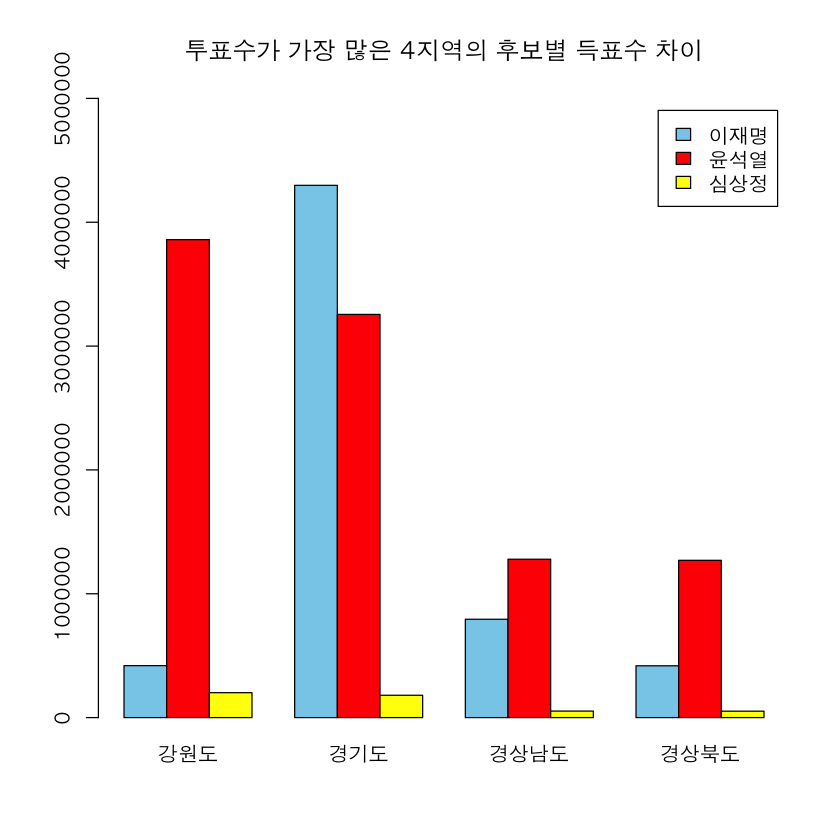

In [25]:
options(scipen = 100)
par(family = "AppleGothic")

barplot(election.t_top4,
        beside = T,
        main = "투표수가 가장 많은 4지역의 후보별 득표수 차이",
        ylim = c(0,5000000),
        col = rep(c("sky blue","red","yellow"),4),
        legend.text = T
       )

---
# 투표수가 높은 시군구의 후보별 득표수를 막대그래프로 시각화

In [26]:
election.city <- as.matrix(head(arrange(election,desc(투표수)),5)[,5:7])
election.city <- t(election.city)

election.city_name <- as.matrix(head(arrange(election,desc(투표수)),5)[,1:2])
election.city_name <- t(election.city_name) 
colnames(election.city) <- paste(election.city_name[1,],election.city_name[2,])

election.city

,경기도 화성시,경기도 부천시,경기도 남양주시,서울특별시 송파구,서울특별시 강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


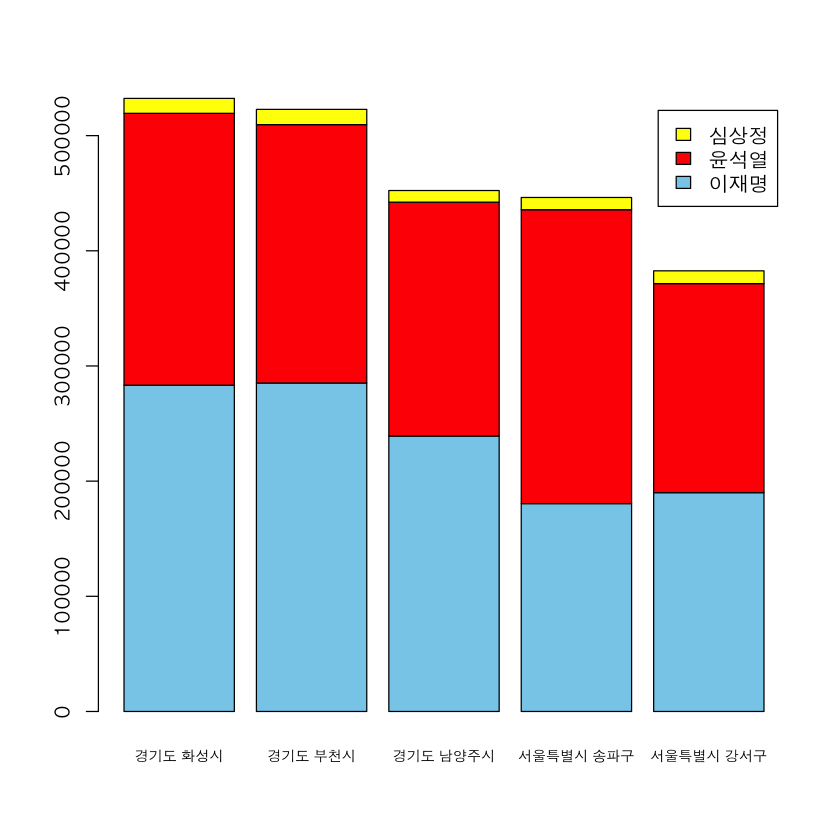

In [27]:
par(family = "AppleGothic")
options(scipen = 100)

barplot(election.city,
        legend.text = T,
        cex.names = 0.7,
        col = c("skyblue","red","yellow")
       )

---
# 투표율 높은 지역과 낮은 지역의 각 후보의 투표율 구하기(4조)

In [28]:
election$기타 <- election[,4]-apply(election[,5:7],1,sum)
광역시도별 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정,기타)~광역시도,election,sum)
광역시도별$투표율 <- (광역시도별$투표수/광역시도별$선거인수)*100
광역시도별 <- arrange(광역시도별,desc(투표율))[c(1,length(광역시도별[,1])),]
광역시도별
result <- round((광역시도별[,c(7,6,5,4)]/광역시도별[,3])*100,2)
# c(7,6,5,4) 행과 열을 뒤집었을 때, 기타~이재명 순으로 데이터가 보이게 하기 위해서 이와 같이 표시함 
rownames(result) <- paste(c('최고 : ','최저 :'),광역시도별$광역시도)
result
t(result)

,광역시도,선거인수,투표수,이재명,윤석열,심상정,기타,투표율
1,광주광역시,1209206,985492,830058,124511,14865,16058,81.49910
17,제주특별자치도,564354,409649,213130,173014,13598,9907,72.58724


,기타,심상정,윤석열,이재명
최고 : 광주광역시,1.63,1.51,12.63,84.23
최저 : 제주특별자치도,2.42,3.32,42.23,52.03


,최고 : 광주광역시,최저 : 제주특별자치도
기타,1.63,2.42
심상정,1.51,3.32
윤석열,12.63,42.23
이재명,84.23,52.03


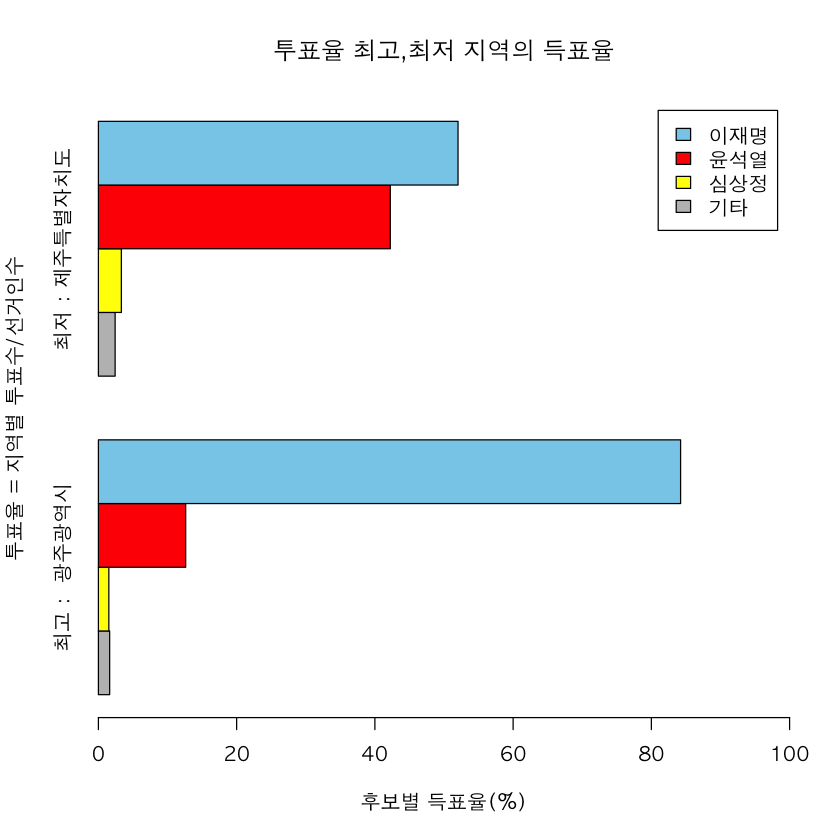

In [29]:
par(family = "AppleGothic",bg='white')
barplot(t(result),
         beside=T,
         xlab="후보별 득표율(%)",
         xlim=c(0,100),
         col=c('grey','yellow','red','skyblue'),
         # 기타 ~ 이재명 컬럼과 색을 맞추기 위해서 이와 같이 표시함
         main = "투표율 최고,최저 지역의 득표율",
         ylab = "투표율 = 지역별 투표수/선거인수",
         legend.text=T,
         horiz=T
        )

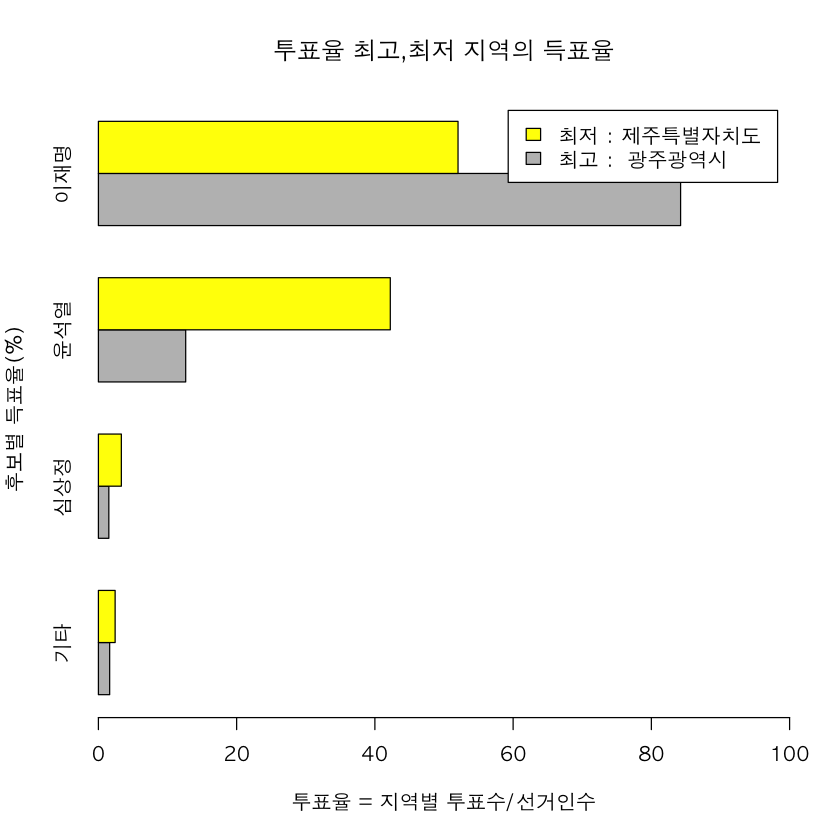

In [30]:
# 참고(행과 열을 뒤집지 않고 했을 때 결과 => 위의 결과보다 결과가 보기 불편함)

par(family = "AppleGothic",bg='white')
barplot(as.matrix(result),
         beside=T,
         ylab="후보별 득표율(%)",
         xlim=c(0,100),
         col=c('grey','yellow'),
         main = "투표율 최고,최저 지역의 득표율",
         xlab = "투표율 = 지역별 투표수/선거인수",
         legend.text=T,
         horiz=T
        )

---
# 광역시도 별 과반수 득표가 나온 시군구 개수(2조)

광역시도,지역ratio,이재명ratio,윤석열ratio
강원도,14,0,14
경기도,26,12,6
경상남도,18,0,18
경상북도,22,0,22
광주광역시,5,5,0
대구광역시,8,0,8
대전광역시,4,0,1
부산광역시,8,0,8
서울특별시,24,2,8
세종특별자치시,1,1,0


지역ratio,14,26,18,22,5,8,4,8,24,1,5,4,22,15,0,8,8
이재명ratio,0,12,0,0,5,0,0,0,2,1,0,0,22,15,0,0,0
윤석열ratio,14,6,18,22,0,8,1,8,8,0,3,3,0,0,0,8,7


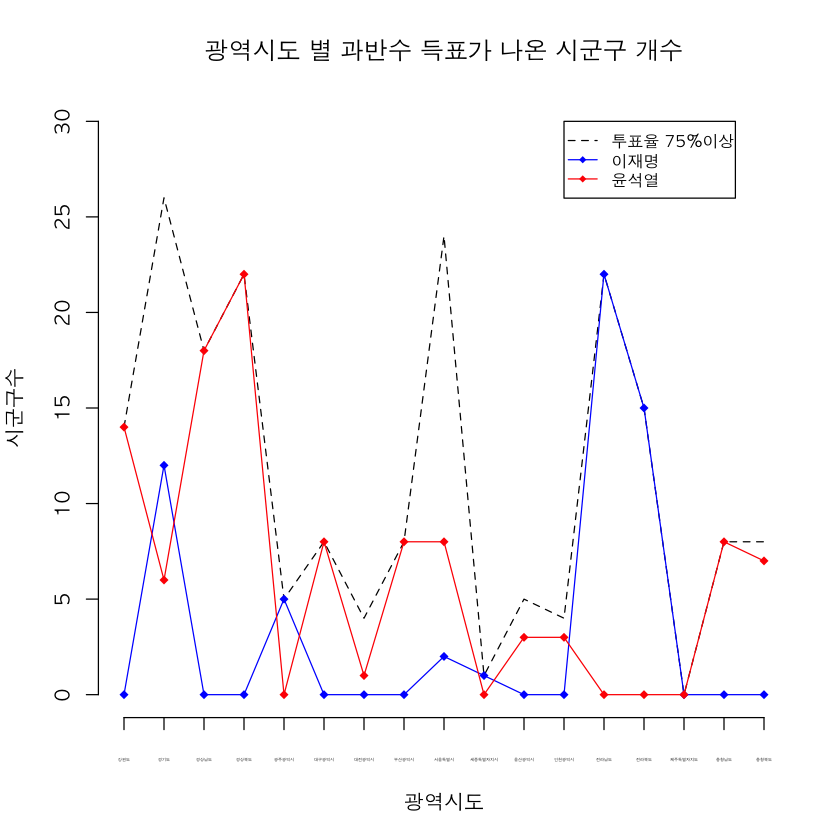

In [31]:
election <- read.csv("./Data/election_2022.csv")

election1 <- election
election1$지역ratio <- ifelse(((election1$투표수/election1$선거인수)*100)>=75,1,0)
election1$이재명ratio <- ifelse(((election1$투표수/election1$선거인수)*100)>=75,
       ifelse(election1[,5]/election1[,4]*100>=50,1,0)
           ,0)
election1$윤석열ratio <- ifelse(((election1$투표수/election1$선거인수)*100)>=75,
       ifelse(election1[,6]/election1[,4]*100>=50,1,0)
           ,0)
electionR <- aggregate(cbind(지역ratio,이재명ratio,윤석열ratio)~광역시도,election1,sum)
electionR
election_R <- t(as.matrix(electionR[,2:4]))
election_R

par(family = "AppleGothic")
plot(election_R[1,],
     type = "line",
     ylim = c(0,30),
     lty = 2,
     axes = F,
     ann = F
    )
# x축과 x축의 라벨을 설정
axis(1, at=1:17, lab=electionR$광역시도,cex.axis=0.2)
# y축과 y축의 라벨을 설정
axis(2, ylim=c(0,30))
# main title 지정
title(main="광역시도 별 과반수 득표가 나온 시군구 개수",col.main="black")

# x축 title(label) 지정
title(xlab="광역시도", col.lab="black")

# y축 title(label) 지정
title(ylab="시군구수", col.lab="black")
lines(election_R[2,],
      type = "o",
      pch = 18,
      lty =1,
      col = "blue"
     )
lines(election_R[3,],
      type = "o",
      pch = 18,
      lty = 1,
      col = "red"
     )
legend(12,30,
       c("투표율 75%이상","이재명","윤석열"),
       col = c("black","blue","red"),
       pch = c(NA,18,18),
       lty = c(2,1,1),
       cex = 0.8
      )

---
# 20대 대선 권역별 후보 득표율(3조)

권역,선거인수,투표수,이재명,윤석열,심상정,ratio
호남권,4887963,3912521,80.64,15.84,1.64,80.04
영남권,10993369,8468363,31.72,63.56,2.19,77.03
수도권,21971908,16904189,48.25,47.29,2.56,76.94
강원권,1333621,1015458,41.33,53.67,2.46,76.14
충청권,4602633,3464133,45.42,49.62,2.58,75.26


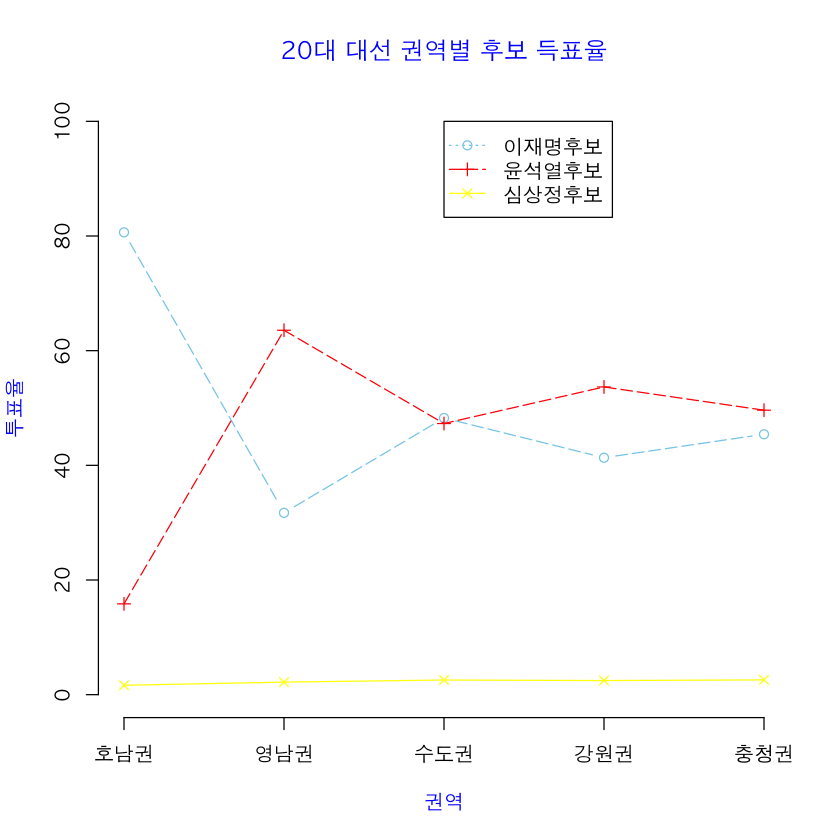

In [32]:
election <- read.csv("./Data/election_2022.csv")
광 <- aggregate(cbind(선거인수, 투표수, 이재명, 윤석열, 심상정)~광역시도, election, sum)
광$권역 <- c('강원권', '수도권', '영남권', '영남권', '호남권', '영남권', '충청권', '영남권', '수도권', '충청권', '영남권', '수도권', '호남권', '호남권', '호남권', '충청권', '충청권')
광 <- aggregate(cbind(선거인수, 투표수, 이재명, 윤석열, 심상정)~권역, 광, sum)
광$ratio <- round(광$투표수/광$선거인수*100,2)
광 <- arrange(광,desc(ratio))
광$이재명 <- round(광$이재명/광$투표수*100,2)
광$윤석열 <- round(광$윤석열/광$투표수*100,2)
광$심상정 <- round(광$심상정/광$투표수*100,2)
광
par(family = "AppleGothic")
plot(광[,4],
     ylim = c(0,100),
     axes = F,
     ann = F,
     type="b", 
     col = "skyblue",
     lty = 5
    )
legend(3,100,
       c("이재명후보","윤석열후보","심상정후보"),
       col = c("skyblue","red","yellow"),
       pch = c(21,3,4),
       lty = c(3,5,1)
      )
title(main="20대 대선 권역별 후보 득표율", col.main="blue")
title(xlab="권역", col.lab="blue")
title(ylab="투표율", col.lab="blue")
axis(1,at=1:5,lab=c('호남권','영남권','수도권','강원권','충청권'))
axis(2,ylim=c(0,100))
lines(광[,5],
      type = "o",
      pch = 3,
      col = "red",
      lty = 5
     )
lines(광[,6],
      type = "o",
      pch = 4,
      col = "yellow",
      lty = 1
     )

---
# 각 시군구별 실제 투표율과 가장 유사한 지역 Top 5를 뽑아서 오차의 합을 막대 그래프로 그려라(1조)

시군구,오차율합
유성구,1.584484
미추홀구,1.870498
동구,1.982266
대덕구,2.050051
청주시흥덕구,2.304917


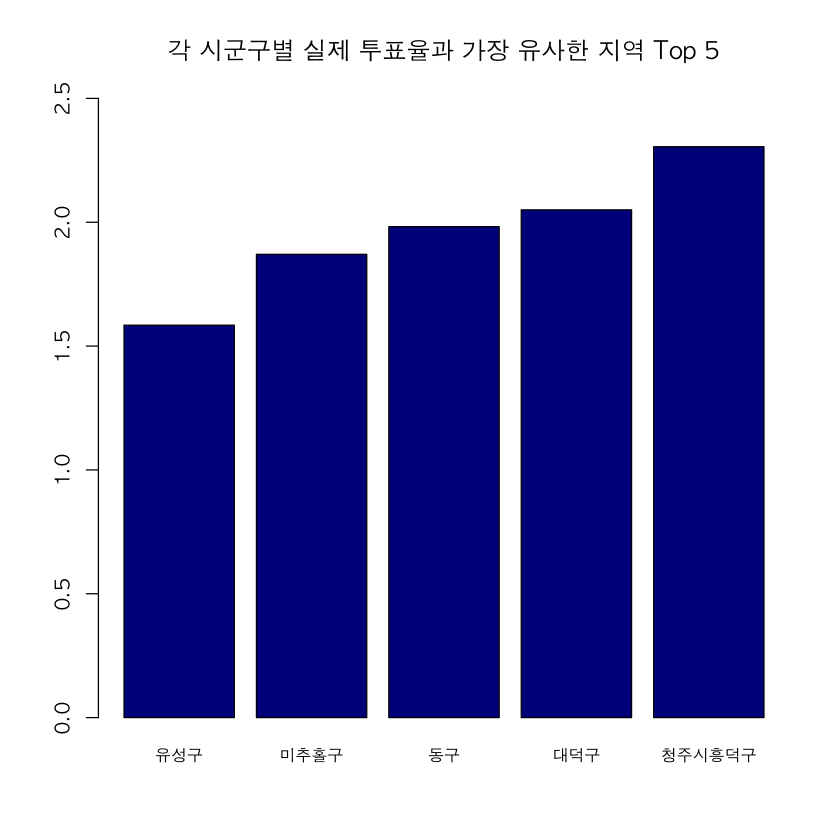

In [33]:
election <- read.csv("./Data/election_2022.csv")
election$시군구별_이재명 = election$이재명 / election$투표수*100
election$시군구별_윤석열 = election$윤석열 / election$투표수*100
election$시군구별_심상정 = election$심상정 / election$투표수*100

election$시군구별_이재명오차율 = abs(election$시군구별_이재명-47.83)
election$시군구별_윤석열오차율 = abs(election$시군구별_윤석열-48.56)
election$시군구별_심상정오차율 = abs(election$시군구별_심상정-2.37)

election$오차율합 = election$시군구별_이재명오차율 +election$시군구별_심상정오차율 +election$시군구별_윤석열오차율 

시 = subset(election, 시군구별_이재명오차율<=1 & 시군구별_윤석열오차율<=1 &시군구별_심상정오차율<=1 & 이재명<윤석열)[,c(2,14)]

시 = arrange(시, 오차율합)
시


par(family = "AppleGothic")
barplot(시[,2],
        main = "각 시군구별 실제 투표율과 가장 유사한 지역 Top 5",
        ylim = c(0.0,2.5),
        col = "darkblue",
        names = 시$시군구,
        cex.names = 0.8
       )
